In [10]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import math
import gc
import os


from sklearn.preprocessing          import LabelEncoder, OneHotEncoder
from sklearn.preprocessing          import StandardScaler, MinMaxScaler, Normalizer, RobustScaler, MaxAbsScaler
from sklearn.model_selection        import KFold, StratifiedGroupKFold, train_test_split, cross_val_score
from sklearn.linear_model           import LogisticRegression, LinearRegression
from sklearn.tree                   import DecisionTreeClassifier
from sklearn.ensemble               import  VotingClassifier, RandomForestClassifier
from sklearn.metrics                import f1_score, confusion_matrix, classification_report, accuracy_score
from imblearn.over_sampling         import SMOTE

from xgboost     import XGBClassifier
from catboost    import CatBoostClassifier
from lightgbm    import LGBMClassifier

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.io as pio
import plotly.graph_objects as go
import plotly.express as px


In [11]:
data = pd.read_csv('stroke.csv')
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4904,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
4905,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
4906,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
4907,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [12]:
data['age']=data['age'].astype(int)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4909 entries, 0 to 4908
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4909 non-null   int64  
 1   gender             4909 non-null   object 
 2   age                4909 non-null   int32  
 3   hypertension       4909 non-null   int64  
 4   heart_disease      4909 non-null   int64  
 5   ever_married       4909 non-null   object 
 6   work_type          4909 non-null   object 
 7   Residence_type     4909 non-null   object 
 8   avg_glucose_level  4909 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     4909 non-null   object 
 11  stroke             4909 non-null   int64  
dtypes: float64(2), int32(1), int64(4), object(5)
memory usage: 441.2+ KB


In [14]:
data.isna().sum()


id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [15]:
plt.figure(figsize=(12, 5))
sns.heatmap(data.corr(), annot=True)

ValueError: could not convert string to float: 'Male'

<Figure size 1200x500 with 0 Axes>

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,4909.0,37064.313506,20995.098457,77.00,18605.00,37608.00,55220.00,72940.00
age,4909.0,42.854145,22.575986,0.00,25.00,44.00,60.00,82.00
hypertension,4909.0,0.091872,0.288875,0.00,0.00,0.00,0.00,1.00
heart_disease,4909.0,0.049501,0.216934,0.00,0.00,0.00,0.00,1.00
avg_glucose_level,4909.0,105.305150,44.424341,55.12,77.07,91.68,113.57,271.74
bmi,4909.0,28.893237,7.854067,10.30,23.50,28.10,33.10,97.60
stroke,4909.0,0.042575,0.201917,0.00,0.00,0.00,0.00,1.00


In [ ]:
def display_unique(data):
    for column in data.columns :
        
        print("No of Unique Values in "+column+" Column are : "+str(data[column].nunique()))
        print("Actual Unique Values in "+column+" Column are : "+str(data[column].sort_values(ascending=True,na_position='last').unique() ))
        print("")
display_unique(data)

No of Unique Values in id Column are : 4909
Actual Unique Values in id Column are : [   77    84    91 ... 72915 72918 72940]

No of Unique Values in gender Column are : 3
Actual Unique Values in gender Column are : ['Female' 'Male' 'Other']

No of Unique Values in age Column are : 83
Actual Unique Values in age Column are : [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82]

No of Unique Values in hypertension Column are : 2
Actual Unique Values in hypertension Column are : [0 1]

No of Unique Values in heart_disease Column are : 2
Actual Unique Values in heart_disease Column are : [0 1]

No of Unique Values in ever_married Column are : 2
Actual Unique Values in ever_married Column are : ['No' 'Yes']

No of Unique Values in work_type Column are : 5
Actual Unique Values in work_type Col

In [ ]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,31112,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,60182,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,1665,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,56669,Male,81,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [ ]:
data['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [ ]:
fig = px.parallel_categories(data[['gender','age','hypertension','heart_disease','ever_married',
            	            'work_type','Residence_type','avg_glucose_level','bmi','smoking_status','stroke']], 
                             color="stroke", 
                             color_continuous_scale=px.colors.sequential.Aggrnyl  )
fig.show()  

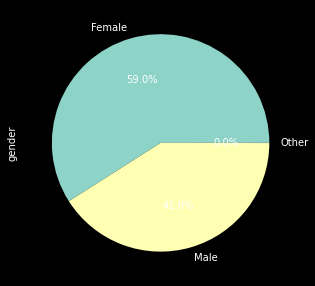

In [ ]:
plt.style.use('dark_background')
plt.figure(figsize=(5,5))
data['gender'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.show()

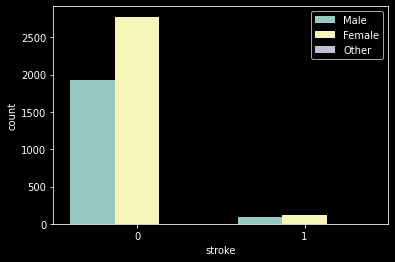

In [ ]:
sns.countplot(x='stroke',hue='gender',data=data)
plt.legend(loc='upper right', bbox_to_anchor=(1,1))
plt.show()

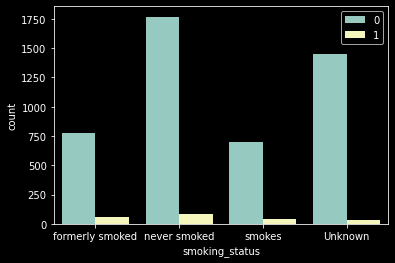

In [ ]:
sns.countplot(x='smoking_status',hue='stroke',data=data)
plt.legend(loc='upper right', bbox_to_anchor=(1,1))
plt.show()

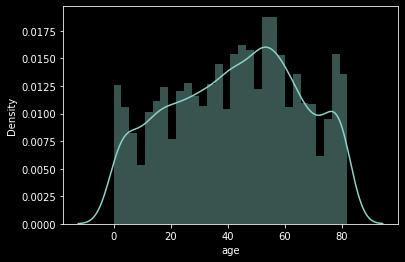

In [ ]:
sns.distplot(data['age'],kde=True,bins=30)
plt.show()


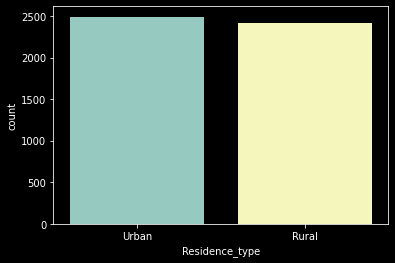

In [ ]:
sns.countplot(x='Residence_type',data=data)
plt.show()

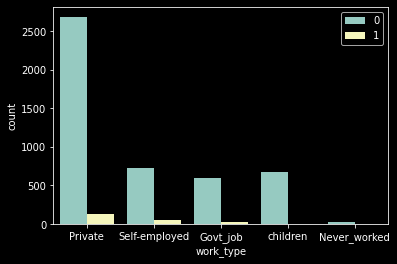

In [ ]:
sns.countplot(x='work_type',hue='stroke',data=data)
plt.legend(loc='upper right')
plt.show()

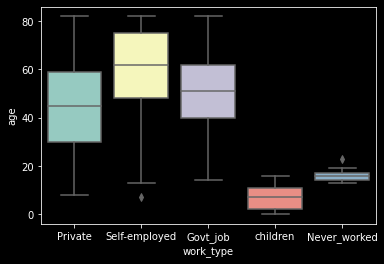

In [ ]:
sns.boxplot(x='work_type',y='age',data=data)
plt.show()

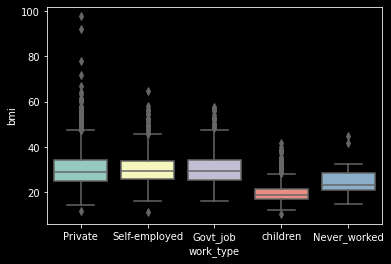

In [ ]:
sns.boxplot(x='work_type',y='bmi',data=data)
plt.show()

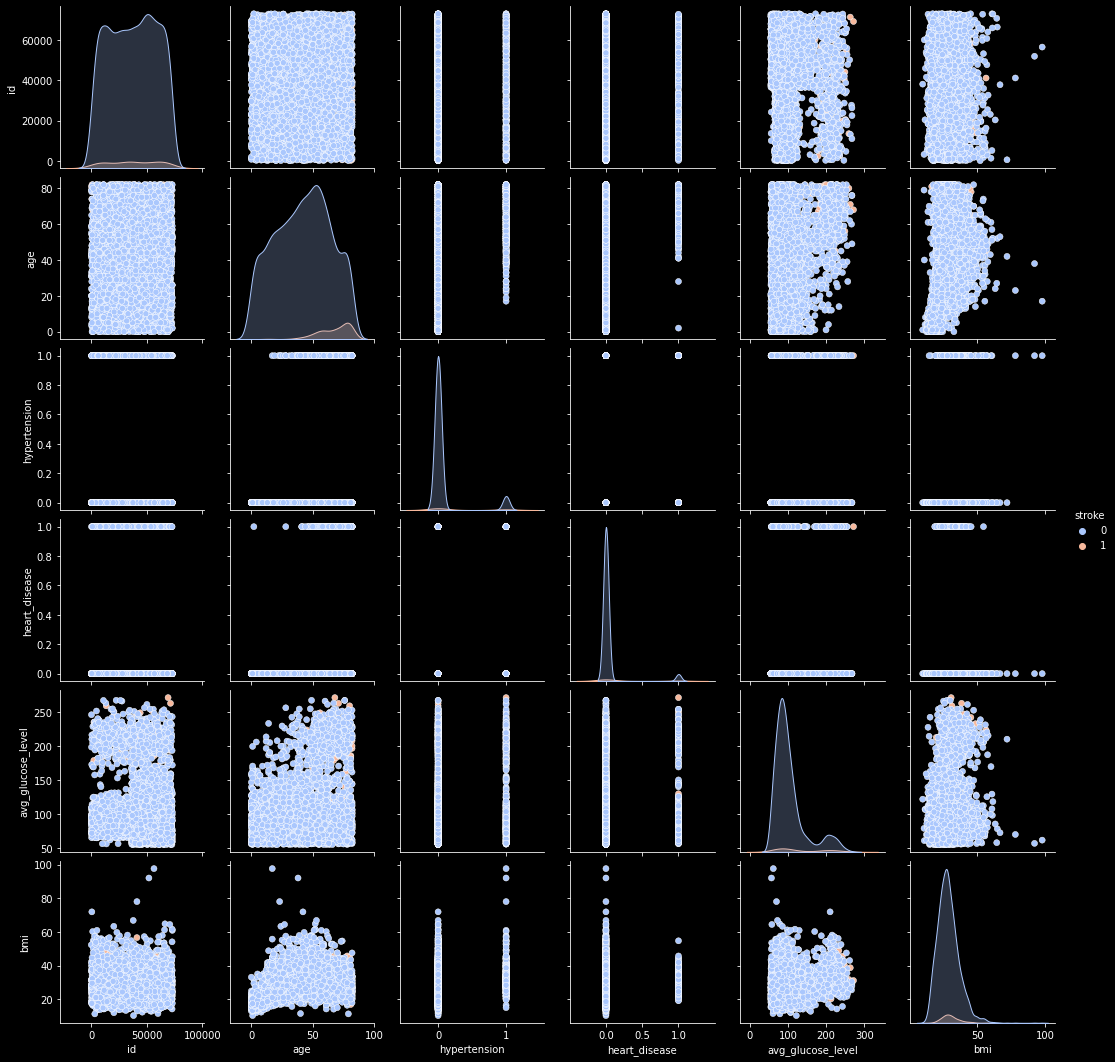

In [ ]:
sns.pairplot(data,hue='stroke',palette = "coolwarm")
plt.show()

In [ ]:
data[data['gender']=='Other']

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2970,56156,Other,26,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0


In [ ]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,31112,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,60182,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,1665,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,56669,Male,81,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [ ]:
data[data['id']==9046]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1


In [ ]:
data[data['Residence_type']=='Unknown']


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


In [ ]:
data.drop(labels=2970,axis=0, inplace=True)
data['gender'].unique()

array(['Male', 'Female'], dtype=object)

In [ ]:
display('head:', data.head())

'head:'

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,31112,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,60182,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,1665,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,56669,Male,81,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,4908.0,37060.423594,20995.468407,77.00,18602.5000,37580.50,55181.750,72940.00
age,4908.0,42.857579,22.577004,0.00,25.0000,44.00,60.000,82.00
hypertension,4908.0,0.091891,0.288901,0.00,0.0000,0.00,0.000,1.00
heart_disease,4908.0,0.049511,0.216954,0.00,0.0000,0.00,0.000,1.00
avg_glucose_level,4908.0,105.297402,44.425550,55.12,77.0675,91.68,113.495,271.74
bmi,4908.0,28.894560,7.854320,10.30,23.5000,28.10,33.100,97.60
stroke,4908.0,0.042584,0.201937,0.00,0.0000,0.00,0.000,1.00


In [ ]:
data.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [ ]:
data.corr()['stroke'].sort_values(ascending = False)

stroke               1.000000
age                  0.232203
hypertension         0.142503
avg_glucose_level    0.138984
heart_disease        0.137929
bmi                  0.042341
id                   0.004878
Name: stroke, dtype: float64

In [19]:
X = data[["gender","age","hypertension","heart_disease","ever_married","work_type","Residence_type","avg_glucose_level","bmi","smoking_status" ]]
y = data['stroke']
print(X)
print

      gender  age  hypertension  heart_disease ever_married      work_type   
0       Male   67             0              1          Yes        Private  \
1       Male   80             0              1          Yes        Private   
2     Female   49             0              0          Yes        Private   
3     Female   79             1              0          Yes  Self-employed   
4       Male   81             0              0          Yes        Private   
...      ...  ...           ...            ...          ...            ...   
4904  Female   13             0              0           No       children   
4905  Female   81             0              0          Yes  Self-employed   
4906  Female   35             0              0          Yes  Self-employed   
4907    Male   51             0              0          Yes        Private   
4908  Female   44             0              0          Yes       Govt_job   

     Residence_type  avg_glucose_level   bmi   smoking_status  

In [27]:
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=0 )
print(y_test)

4675    0
562     0
1379    0
4374    0
4179    0
       ..
1013    0
1826    0
2062    0
1615    0
4552    0
Name: stroke, Length: 982, dtype: int64


In [ ]:
X_train.shape, X_test.shape,y_train.shape,y_test.shape

((3926, 10), (982, 10), (3926,), (982,))

In [23]:
def data_encoding( encoding_strategy , encoding_data , encoding_columns ):
    
    if encoding_strategy == "LabelEncoding":
        print("IF LabelEncoding")
        Encoder = LabelEncoder()
        for column in encoding_columns :
            print("column",column )
            encoding_data[ column ] = Encoder.fit_transform(tuple(encoding_data[ column ]))
        
    elif encoding_strategy == "OneHotEncoding":
        print("ELIF OneHotEncoding")
        encoding_data = pd.get_dummies(encoding_data)
        
    dtypes_list =['float64','float32','int64','int32']
    encoding_data.astype( dtypes_list[0] ).dtypes
    
    return encoding_data
encoding_columns  = [ "gender","ever_married","Residence_type", "work_type","smoking_status"]
encoding_strategy = [ "LabelEncoding", "OneHotEncoding"]

X_train_encode = data_encoding( encoding_strategy[0] , X_train , encoding_columns )
X_test_encode =  data_encoding( encoding_strategy[0] , X_test , encoding_columns )
print(X_train)



IF LabelEncoding
column gender
column ever_married
column Residence_type
column work_type
column smoking_status
IF LabelEncoding
column gender
column ever_married
column Residence_type
column work_type
column smoking_status
      gender  age  hypertension  heart_disease  ever_married  work_type   
4840       1   56             0              0             1          3  \
3028       1   24             0              0             1          2   
3972       0   81             1              1             1          3   
1563       0   32             0              0             0          2   
2843       0   62             0              0             1          2   
...      ...  ...           ...            ...           ...        ...   
4859       0   49             0              0             1          0   
3264       0   51             0              0             1          0   
1653       1   24             1              0             1          2   
2607       1    9         

In [ ]:
display(X_train_encode.shape)
#display(X_test_encode.shape)

(3926, 10)

In [ ]:
X_train_encode

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
4840,1,56,0,0,1,3,0,125.87,24.6,2
3029,0,24,0,0,0,0,1,104.86,19.8,2
3973,1,30,0,0,1,2,0,58.89,26.1,1
1563,0,32,0,0,0,2,1,68.19,21.1,2
2843,0,62,0,0,1,2,0,203.57,29.1,0
...,...,...,...,...,...,...,...,...,...,...
4860,1,21,0,0,0,2,0,89.29,23.4,2
3265,0,82,0,0,1,3,0,84.42,25.7,0
1653,1,24,1,0,1,2,0,80.63,28.2,3
2607,1,9,0,0,0,4,1,142.68,24.4,0


In [ ]:
#X_train_encode_2 = pd.get_dummies(X_train_encode_2)
#X_train_encode_2.head(2)

In [24]:
def data_scaling( scaling_strategy , scaling_data , scaling_columns ):
    
    if    scaling_strategy =="RobustScaler" :
        scaling_data[scaling_columns] = RobustScaler().fit_transform(scaling_data[scaling_columns])
        
    elif  scaling_strategy =="StandardScaler" :
        scaling_data[scaling_columns] = StandardScaler().fit_transform(scaling_data[scaling_columns])
        
    elif  scaling_strategy =="MinMaxScaler" :
        scaling_data[scaling_columns] = MinMaxScaler().fit_transform(scaling_data[scaling_columns])
        
    elif  scaling_strategy =="MaxAbsScaler" :
        scaling_data[scaling_columns] = MaxAbsScaler().fit_transform(scaling_data[scaling_columns])
        
    else :  # If any other scaling send by mistake still perform Robust Scalar
        scaling_data[scaling_columns] = RobustScaler().fit_transform(scaling_data[scaling_columns])
    
    return scaling_data
scaling_strategy = ["RobustScaler", "StandardScaler","MinMaxScaler","MaxAbsScaler"]
X_train_scale = data_scaling( scaling_strategy[1] , X_train_encode , X_train_encode.columns )
X_test_scale  = data_scaling( scaling_strategy [1] , X_test_encode  , X_test_encode.columns )
print(X_train)



        gender       age  hypertension  heart_disease  ever_married   
4840  1.200270  0.592003     -0.312315      -0.226728      0.740197  \
3028  1.200270 -0.827692     -0.312315      -0.226728      0.740197   
3972 -0.831394  1.701140      3.201898       4.410570      0.740197   
1563 -0.831394 -0.472768     -0.312315      -0.226728     -1.350992   
2843 -0.831394  0.858196     -0.312315      -0.226728      0.740197   
...        ...       ...           ...            ...           ...   
4859 -0.831394  0.281445     -0.312315      -0.226728      0.740197   
3264 -0.831394  0.370175     -0.312315      -0.226728      0.740197   
1653  1.200270 -0.827692      3.201898      -0.226728      0.740197   
2607  1.200270 -1.493174     -0.312315      -0.226728     -1.350992   
2732  1.200270  0.680734     -0.312315      -0.226728      0.740197   

      work_type  Residence_type  avg_glucose_level       bmi  smoking_status  
4840   0.755311       -1.007925           0.468706 -0.543504        

In [26]:

sm = SMOTE(random_state=2)
x_train_res, y_train_res = sm.fit_resample(X_train_scale, y_train.ravel())
print(x_train_res)

        gender       age  hypertension  heart_disease  ever_married   
0     1.200270  0.592003     -0.312315      -0.226728      0.740197  \
1     1.200270 -0.827692     -0.312315      -0.226728      0.740197   
2    -0.831394  1.701140      3.201898       4.410570      0.740197   
3    -0.831394 -0.472768     -0.312315      -0.226728     -1.350992   
4    -0.831394  0.858196     -0.312315      -0.226728      0.740197   
...        ...       ...           ...            ...           ...   
7517  1.200270  0.158062     -0.312315      -0.226728      0.740197   
7518  1.200270  0.256186     -0.312315      -0.226728      0.740197   
7519 -0.831394  0.336197     -0.312315      -0.226728      0.740197   
7520  1.200270  1.501719     -0.312315       4.410570      0.740197   
7521 -0.831394  1.448386     -0.312315      -0.226728      0.740197   

      work_type  Residence_type  avg_glucose_level       bmi  smoking_status  
0      0.755311       -1.007925           0.468706 -0.543504        

Random Forest Classifirer

In [ ]:
pred = RandomForestClassifier()
pred.fit(X_train_scale, y_train)

# accuracy score, confusion matrix and classification report of random forest

pred_acc = accuracy_score(y_test, pred.predict(X_test_scale))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, pred.predict(X_train_scale))}")
print(f"Test Accuracy of Decision Tree Classifier is {pred_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, pred.predict(X_test_scale))}\n")
print(f"Classification Report :- \n {classification_report(y_test, pred.predict(X_test_scale))}")

Training Accuracy of Decision Tree Classifier is 1.0
Test Accuracy of Decision Tree Classifier is 0.9562118126272913 

Confusion Matrix :- 
[[939   0]
 [ 43   0]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       939
           1       0.00      0.00      0.00        43

    accuracy                           0.96       982
   macro avg       0.48      0.50      0.49       982
weighted avg       0.91      0.96      0.93       982



In [ ]:
Classifiers = {'0._XGBoost' : XGBClassifier(learning_rate =0.1, n_estimators=494, max_depth=5,subsample = 0.70, verbosity = 0,
                                            scale_pos_weight = 2.5,updater ="grow_histmaker",base_score  = 0.2),
               
               '1.CatBoost' : CatBoostClassifier(learning_rate=0.15, n_estimators=494, subsample=0.085, 
                                                 max_depth=5, scale_pos_weight=2.5),
               
               '2.LightGBM' : LGBMClassifier(subsample_freq = 2, objective ="binary",importance_type = "gain",
                                             verbosity = -1, max_bin = 60,num_leaves = 300,
                                             boosting_type = 'dart',learning_rate=0.15, 
                                             n_estimators=494, max_depth=5, scale_pos_weight=2.5)
 }

print( list(Classifiers.keys()) )
print( list(Classifiers.values()) )


['0._XGBoost', '1.CatBoost', '2.LightGBM']
[XGBClassifier(base_score=0.2, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, gamma=None,
              gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=494, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None,
              reg_alpha=None, reg_lambda=None, ...), <catboost.core.CatBoostClassifier object at 0x0000021EF1E10EE0>, LGBMClassifier(boosting_type='dart', importance_type='gain', learning_rate=0.15,
               max_bin=60, max_depth=5, n_estimators=494, num_leaves=300,

In [ ]:
ensemble_model = VotingClassifier(estimators=[
                                              ('XGBoost_Best', list(Classifiers.values())[0]), 
                                              ('CatBoost_Best', list(Classifiers.values())[1]),
                                              ('LightGBM_Best', list(Classifiers.values())[2]),
                                             ], 
                                              voting='soft',weights=[5,5,5.2])

ensemble_model.fit(X_train_scale,y_train) 

Predicted_predictions_model = ensemble_model.predict_proba( X_test_scale )
#ival = accuracy_score(y_test, ensemble_model.predict(X_test_scale))

print("===============================")

print(f"Training Accuracy of Voting  Classifier is {accuracy_score(y_train, ensemble_model.predict(X_train_scale))*100}")
#print(f"Test Accuracy of Voting Classifier is {ival*100} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, ensemble_model.predict(X_test_scale))}\n")
print(f"Classification Report :- \n {classification_report(y_test, ensemble_model.predict(X_test_encode))}")


0:	learn: 0.5210114	total: 3.65ms	remaining: 1.8s
1:	learn: 0.4413232	total: 6.16ms	remaining: 1.51s
2:	learn: 0.3736828	total: 8.25ms	remaining: 1.35s
3:	learn: 0.3338664	total: 10.5ms	remaining: 1.29s
4:	learn: 0.3047054	total: 12.5ms	remaining: 1.22s
5:	learn: 0.2840805	total: 14.7ms	remaining: 1.19s
6:	learn: 0.2698422	total: 16.7ms	remaining: 1.16s
7:	learn: 0.2595651	total: 19.9ms	remaining: 1.21s
8:	learn: 0.2541959	total: 22.1ms	remaining: 1.19s
9:	learn: 0.2500490	total: 24.3ms	remaining: 1.18s
10:	learn: 0.2449759	total: 26.5ms	remaining: 1.16s
11:	learn: 0.2409427	total: 28.7ms	remaining: 1.15s
12:	learn: 0.2327718	total: 30.9ms	remaining: 1.14s
13:	learn: 0.2306224	total: 33.7ms	remaining: 1.15s
14:	learn: 0.2282471	total: 36.1ms	remaining: 1.15s
15:	learn: 0.2252660	total: 38.2ms	remaining: 1.14s
16:	learn: 0.2238474	total: 40.6ms	remaining: 1.14s
17:	learn: 0.2224658	total: 42.7ms	remaining: 1.13s
18:	learn: 0.2207993	total: 44.9ms	remaining: 1.12s
19:	learn: 0.2195933	to

gender:[Male:1, Female:0] 
hypertension:[yes:1, no:0]
heart_disease:[yes:1, no:0]
ever_married:[yes:1, no:0]
Residence_type:[rural:0, urban:1],
work_type:['Govt_job:0' ,'Never_worked:1', 'Private:2', 'Self-employed:2' ,'children:4']
smoking_status:['Unknown:0' ,'formerly smoked:1' ,'never smoked:2', 'smokes:3']

In [ ]:
#input_data = (age,gender,hypertension, heart_disease, ever_married, work_type,Residence_type,avg_glucose_level,bmi,smoking_status)
input_data = (80,1,0,1,1,2,0,105.92,32.5,2)

input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped= input_data_as_numpy_array.reshape(1,-1)

prediction = pred.predict(input_data_reshaped)
print(prediction)

if (prediction == 0):
  print("The person is not having a chances of stroke")
else:
  print("The person is having a chance of stroke")

[0]
The person is not having a chances of stroke


In [ ]:
import pickle

In [ ]:
file_name = ('trained_model.sav')
pickle.dump(pred, open(file_name,"wb"))

NameError: name 'pred' is not defined

In [ ]:
loading_model = pickle.load(open('trained_model.sav', 'rb'))

In [ ]:
#input_data = (age,gender,hypertension, heart_disease, ever_married, work_type,Residence_type,avg_glucose_level,bmi,smoking_status)
input_data = (80,1,0,1,1,2,0,105.92,32.5,2)

input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped= input_data_as_numpy_array.reshape(1,-1)

prediction = loading_model.predict(input_data_reshaped)
print(prediction)

if (prediction == 0):
  print("The person is not having a chances of stroke")
else:
  print("The peson is having a chance of stroke")

[0]
The person is not having a chances of stroke
